In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
def make_plot(truth, prediction):
  plt.plot(truth, color="red", label="truth")
  plt.plot(prediction, color="blue", label="predicted")
  plt.legend()
  plt.grid()
  plt.title("Comparing truth and predicted regression values")
  plt.tight_layout()
  plt.show()

In [5]:
train = pd.read_csv('/content/drive/MyDrive/msc_training_dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/msc_testing_dataset.csv')

In [6]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [7]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [8]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [11]:
train['room'].describe()

count    3000.000000
mean        2.990000
std         1.424281
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: room, dtype: float64

In [12]:
test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [13]:
train_X = train.drop('price', axis=1)
test_X = test.drop('price', axis=1)
train_Y = train['price']
test_Y = test['price']

In [14]:
train_X.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
2,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0


In [15]:
train_Y

0       6835
1       9005
2       9005
3       5105
4       9105
        ... 
2995    4825
2996    6755
2997    7565
2998    9135
2999    8955
Name: price, Length: 3000, dtype: int64

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_Y)

In [17]:
reg

LinearRegression()

In [18]:
predicted = reg.predict(test_X)

In [19]:
predicted

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [20]:
print(reg.score(train_X, train_Y))

1.0


In [21]:
print(mean_absolute_error(test_Y, predicted))

13.000000000000469


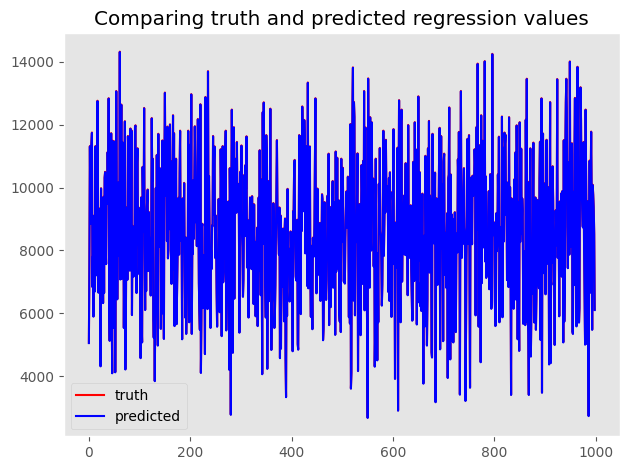

In [22]:
make_plot(test_Y, predicted)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor().fit(train_X, train_Y)
rf_predicted = rf_reg.predict(test_X)
print(rf_reg.score(train_X, train_Y))
print(mean_absolute_error(test_Y, rf_predicted))

0.9984489973882053
171.26716716716717


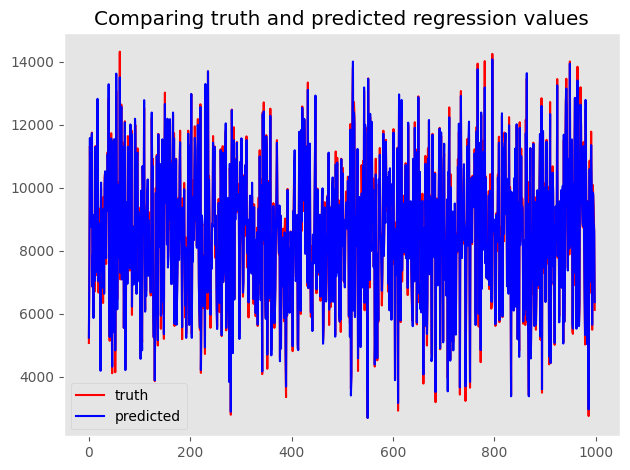

In [24]:
make_plot(test_Y, rf_predicted)

In [25]:
rf_reg.feature_importances_

array([0.4293662 , 0.00463357, 0.0112652 , 0.00881025, 0.01448744,
       0.19807757, 0.00690378, 0.11508795, 0.17652958, 0.00891641,
       0.02592204])

In [27]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [28]:
imp_scores = zip(rf_reg.feature_importances_, train.columns)
sorted(list(imp_scores), reverse=True)

[(0.42936619634383777, 'room'),
 (0.1980775747719201, 'furnished'),
 (0.17652958160909285, 'woodfloor'),
 (0.11508795023549505, 'solar_power'),
 (0.02592204139664727, 'club_access'),
 (0.014487436741411792, 'backyard'),
 (0.01126520369973019, 'kitchen'),
 (0.008916413421326411, 'qlm_security'),
 (0.008810253082143117, 'french_door'),
 (0.006903776811549729, 'green_paint'),
 (0.0046335718868457335, 'bathroom')]

In [29]:
rf_importances = rf_reg.feature_importances_
rf_reg.feature_names_in_
ranks_and_features = zip(rf_importances, rf_reg.feature_names_in_)
ranks_and_features = sorted(ranks_and_features,reverse=True)
for x, y in ranks_and_features:
    print(x, y)

0.42936619634383777 room
0.1980775747719201 furnished
0.17652958160909285 woodfloor
0.11508795023549505 solar_power
0.02592204139664727 club_access
0.014487436741411792 backyard
0.01126520369973019 kitchen
0.008916413421326411 qlm_security
0.008810253082143117 french_door
0.006903776811549729 green_paint
0.0046335718868457335 bathroom


In [30]:
keys = [k[1] for k in ranks_and_features ] [::-1]
keys

['bathroom',
 'green_paint',
 'french_door',
 'qlm_security',
 'kitchen',
 'backyard',
 'club_access',
 'solar_power',
 'woodfloor',
 'furnished',
 'room']

In [31]:
values = [k[0] for k in ranks_and_features ][::-1]
values

[0.0046335718868457335,
 0.006903776811549729,
 0.008810253082143117,
 0.008916413421326411,
 0.01126520369973019,
 0.014487436741411792,
 0.02592204139664727,
 0.11508795023549505,
 0.17652958160909285,
 0.1980775747719201,
 0.42936619634383777]

<BarContainer object of 11 artists>

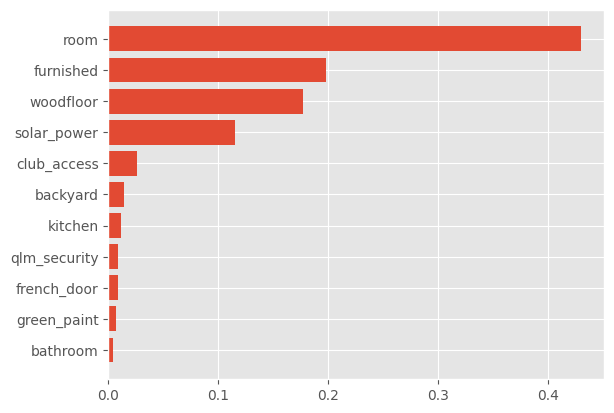

In [32]:
plt.barh(keys, values)

0.9471383275821861
471.3446303446304


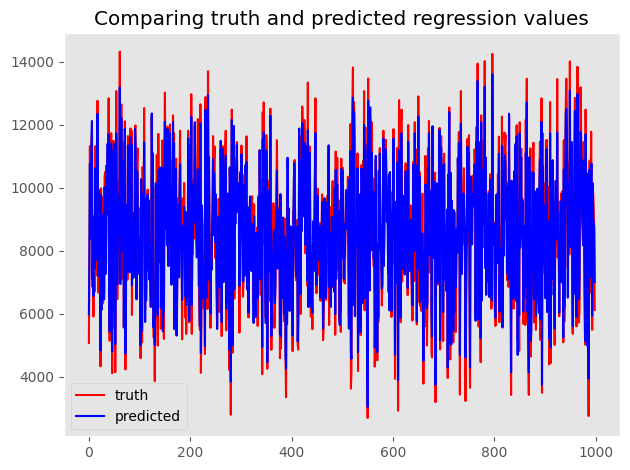

In [33]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(train_X, train_Y)
knn_predicted = neigh.predict(test_X)
print(neigh.score(train_X, train_Y))
print(mean_absolute_error(test_Y, knn_predicted))
make_plot(test_Y, knn_predicted)

In [34]:
import xgboost as xgb
xgb_reg =  xgb.XGBRegressor().fit(train_X, train_Y)
xgb_predicted = xgb_reg.predict(test_X)
print("R-sqaured:", xgb_reg.score(train_X, train_Y))
print("Mean Absolute Error:", mean_absolute_error(test_Y, xgb_predicted))
xgb_importances = xgb_reg.feature_importances_
xgb_ranks_and_features = zip(xgb_importances, rf_reg.feature_names_in_)
xgb_ranks_and_features = sorted(xgb_ranks_and_features,reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in xgb_ranks_and_features:
    print(x, y)

R-sqaured: 0.9997084329328167
Mean Absolute Error: 60.142959121230604

Feature Importances with XGBoost:
0.29977584 room
0.241706 woodfloor
0.2364698 furnished
0.11214046 solar_power
0.026595302 club_access
0.019723801 backyard
0.01696462 qlm_security
0.014970071 kitchen
0.011910282 french_door
0.011131189 green_paint
0.0086126365 bathroom


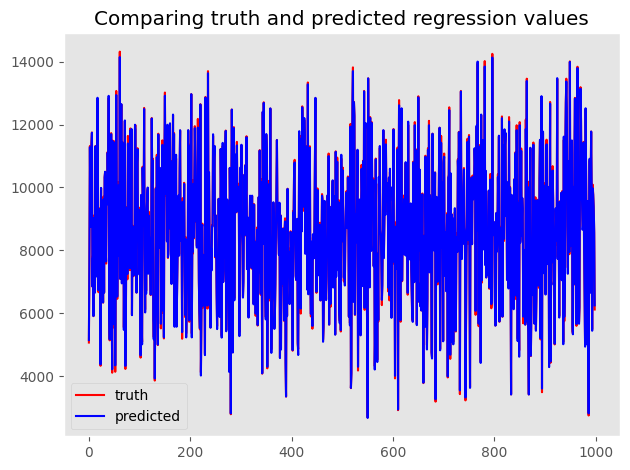

In [35]:
make_plot(test_Y, xgb_predicted)

Text(0.5, 1.0, 'MAE for various regression algorithms')

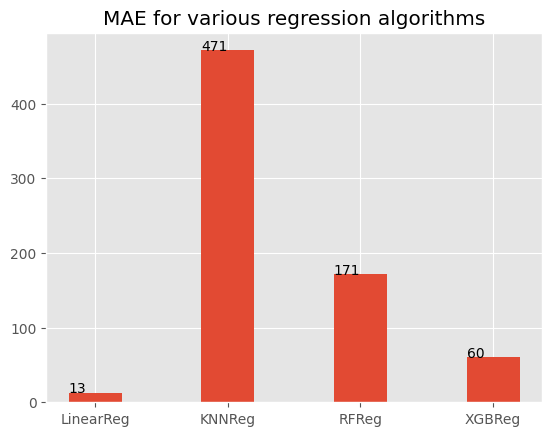

In [36]:
lin_mae = mean_absolute_error(test_Y, predicted)
knn_mae = mean_absolute_error(test_Y, knn_predicted)
rf_mae = mean_absolute_error(test_Y, rf_predicted)
xgb_mae = mean_absolute_error(test_Y, xgb_predicted)
errors = [lin_mae, knn_mae, rf_mae, xgb_mae]
labels = ["LinearReg", "KNNReg", "RFReg", "XGBReg"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")